Name Surname: Alper Daşgın

Student No: 150210067

---

Libraries to be used

---

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Logistic Regression (35 points)

Logistic Regression with MSE Loss (5 points)

In [9]:
class LogisticRegressionMSE:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def fit(self):
        for i in range(self.iterations):
            lineer_model = np.dot(self.train_data, self.weights) + self.bias
            predicted_y = self.sigmoid(lineer_model)

            error = predicted_y - self.train_label
            dw = (2 / len(self.train_label)) * np.dot(self.train_data.T, error)
            db = (2 / len(self.train_label)) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0:

                train_predictions = self.predict(self.train_data)
                train_accuracy = np.mean(train_predictions == self.train_label) * 100
                self.accuracy_train_data_during_training.append(train_accuracy)

                # Test accuracy
                test_predictions = self.predict(self.test_data)
                test_accuracy = np.mean(test_predictions == self.test_label) * 100
                self.accuracy_test_data_during_training.append(test_accuracy)

        pass

    def predict(self, test_data):
        lineer_model = np.dot(test_data, self.weights) + self.bias
        y_predicted = self.sigmoid(lineer_model)
        #this is the threshold for binary expectations
        return [1 if i >= 0.5 else 0 for i in y_predicted]


Logistic Regression with Cross Entropy Loss (5 points)

In [10]:
class LogisticRegressionCrossEntropy:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def fit(self):
        for i in range(self.iterations):
            lineer_model = np.dot(self.train_data, self.weights) +self.bias
            predicted_y_value = self.sigmoid(lineer_model)

            errors = predicted_y_value - self.train_label
            dw = np.dot(self.train_data.T, errors) / len(self.train_data)
            db = np.sum(errors) / len(self.train_data)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = -(1 / len(self.train_label)) * np.sum(
                self.train_label * np.log(predicted_y_value + 1e-8) +
                (1 - self.train_label) * np.log(1 - predicted_y_value + 1e-8)
            )
            self.loss_history.append(loss)


            if i %100 == 0:
                train_predictions = self.predict(self.train_data)
                train_accuracy = np.mean(train_predictions == self.train_label) * 100
                self.accuracy_train_data_during_training.append(train_accuracy)

                test_predictions = self.predict(self.test_data)
                test_accuracy = np.mean(test_predictions == self.test_label) * 100
                self.accuracy_test_data_during_training.append(test_accuracy)

        pass

    def predict(self, test_data):
        lineer_model = np.dot(test_data, self.weights) + self.bias
        predicted_y = self.sigmoid(lineer_model)
        return [1 if i >= 0.5 else 0 for i in predicted_y]
        pass

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [11]:
from sklearn.datasets import make_classification, load_iris
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=5000)
model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=5000)

model_mse.fit()
model_ce.fit()

predictions_mse = model_mse.predict(X_test)
predictions_ce = model_ce.predict(X_test)


accuracy_mse = np.mean(predictions_mse == y_test) * 100
accuracy_ce = np.mean(predictions_ce == y_test) * 100


print(f"Custom Logistic Regression (MSE) Test Accuracy: {accuracy_mse:.2f}%")
print(f"Custom Logistic Regression (Cross-Entropy) Test Accuracy: {accuracy_ce:.2f}%")


sklearn_model = SklearnLogisticRegression(max_iter=5000, solver='liblinear')
sklearn_model.fit(X_train, y_train)

sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions) * 100

print(f"Sklearn Logistic Regression Test Accuracy: {sklearn_accuracy:.2f}%")


Custom Logistic Regression (MSE) Test Accuracy: 89.00%
Custom Logistic Regression (Cross-Entropy) Test Accuracy: 88.67%
Sklearn Logistic Regression Test Accuracy: 89.00%


#### Experiment

Dataset preparation

In [12]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use two Logistic Regression Methods on the dataset directly (10 points)
Show accuracy scores on test data

In [13]:
model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=5000)
model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=5000)

model_mse.fit()
model_ce.fit()

test_predictions_mse = model_mse.predict(X_test)
test_accuracy_mse = np.mean(test_predictions_mse == y_test) * 100
print(f"Logistic regression  with MSE testing accuracy: {test_accuracy_mse:.2f}%")


test_predictions_ce = model_ce.predict(X_test)
test_accuracy_ce = np.mean(test_predictions_ce == y_test) * 100
print(f"Logistic regression with cross entropy test accuracy: {test_accuracy_ce:.2f}%")


Logistic regression  with MSE testing accuracy: 80.60%
Logistic regression with cross entropy test accuracy: 78.36%


Plot the training and test accuracy across the learning iterations of gradient descent

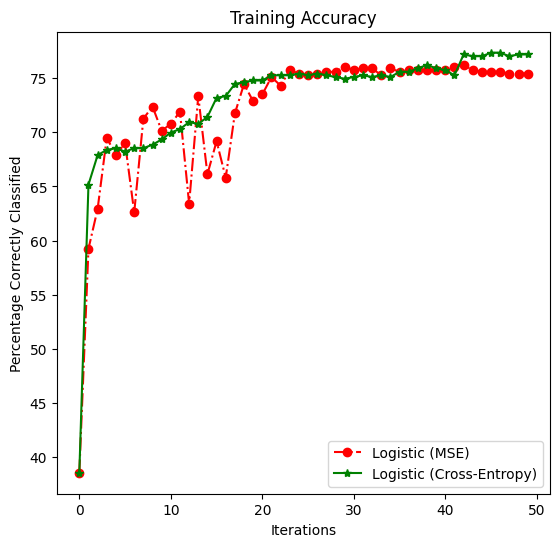

In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Training Accuracy')
plt.plot(model_mse.accuracy_train_data_during_training, 'r-.o', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_train_data_during_training, 'g-*', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')


plt.show()


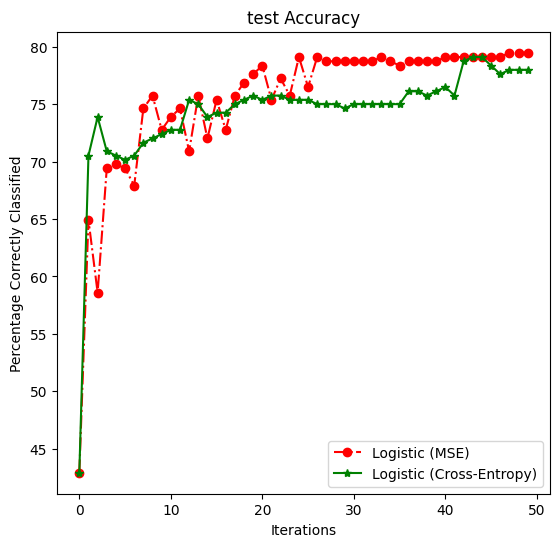

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('test Accuracy')
plt.plot(model_mse.accuracy_test_data_during_training, 'r-.o', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_test_data_during_training, 'g-*', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')


plt.show()

Explain the differences between MSE and Cross Entropy Loss in logistic regression, why is one of the versions of Logistic Regression learning faster in terms of gradient descent iterations than the other? (5 points)

Answer:


In [ ]:
The slope of cross entropy stays significant when predictions are far from the true label, which stimulates larger weight updates during gradient descent.
As predictions get closer to true labels, the gradient for MSE decreases, which causes slower resolution as updates get smaller.
Furthermore, cross entropy avoids the mismatch that occurs when using MSE, which assumes linearity, by directly aligning with the models probabilistic output. In terms of gradient descent iterations, this alignment guarantees faster convergence and more effective optimisation.

SyntaxError: invalid syntax (<ipython-input-9-9a3965c9d915>, line 1)

Show the plots demonstrating the effects of the learning rate and the number of iterations parameters on the training process (hyperparameter tuning) (5 points)

<ipython-input-9-8ef437b7d7e8>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


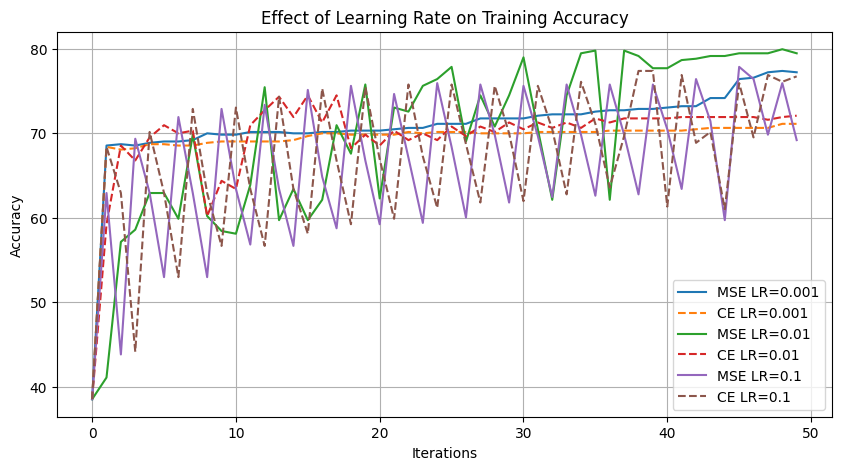

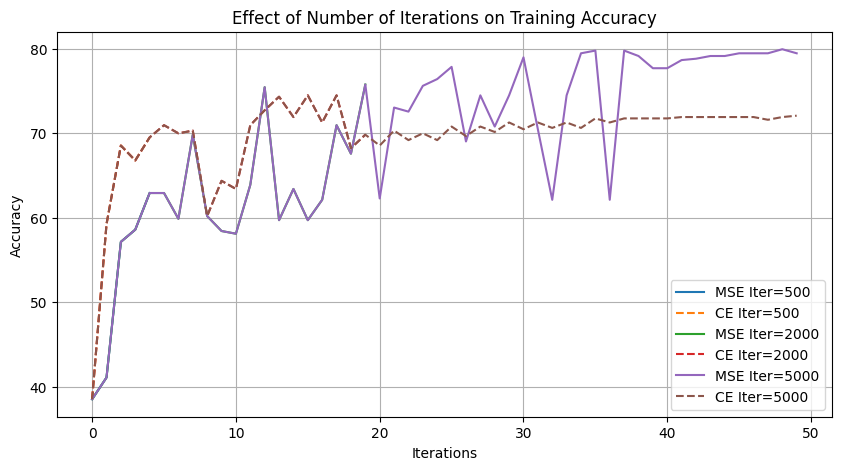

In [16]:
import matplotlib.pyplot as plt
import numpy as np


learning_rates = [0.001, 0.01, 0.1]
iteration_counts = [500, 2000, 5000]


mse_train_accuracies = {}
ce_train_accuracies = {}


for lr in learning_rates:
    model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=5000)
    model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=5000)

    model_mse.fit()
    model_ce.fit()

    mse_train_accuracies[lr] = model_mse.accuracy_train_data_during_training
    ce_train_accuracies[lr] = model_ce.accuracy_train_data_during_training


plt.figure(figsize=(10, 5))
for lr in learning_rates:
    plt.plot(mse_train_accuracies[lr], label=f"MSE LR={lr}")
    plt.plot(ce_train_accuracies[lr], linestyle='--', label=f"CE LR={lr}")

plt.title("Effect of Learning Rate on Training Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


mse_train_accuracies = {}
ce_train_accuracies = {}

for iters in iteration_counts:
    model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=iters)
    model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=iters)

    model_mse.fit()
    model_ce.fit()

    mse_train_accuracies[iters] = model_mse.accuracy_train_data_during_training
    ce_train_accuracies[iters] = model_ce.accuracy_train_data_during_training


plt.figure(figsize=(10, 5))
for iters in iteration_counts:
    plt.plot(mse_train_accuracies[iters], label=f"MSE Iter={iters}")
    plt.plot(ce_train_accuracies[iters], linestyle='--', label=f"CE Iter={iters}")

plt.title("Effect of Number of Iterations on Training Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


#### Decision Tree (35 points)

Implement Decision Tree Method (5 points)

In [17]:
class DecisionTree:
    def __init__(self, columns, depth=None):
        self.max_depth = depth
        self.columns = columns
        self.tree = None


    def best_split(self, data, labels):
        best_feature = None
        best_threshold = None
        best_gini = float('inf')
        the_best_split = None

        n_samples, n_features = data.shape

        for feature in range(n_features):
          thresholds = np.unique(data[:, feature])
          for threshold in thresholds:
             left_indices = data[:, feature] <= threshold
             right_indices = data[:, feature] >= threshold

             if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                continue


             left_labels = labels[left_indices]
             right_labels = labels[right_indices]

             gini = self.gini_impurity(left_labels,right_labels)
             if gini < best_gini:

                best_gini = gini
                best_feature = feature
                best_threshold = threshold
                the_best_split = (left_indices, right_indices)

        return best_feature, best_threshold, the_best_split


    def gini_impurity(self, left_labels, right_labels):
        def gini(labels):
          proportions = np.bincount(labels)/len(labels)
          return 1.0 - np.sum(proportions**2)

        n_left = len(left_labels)
        n_right = len(right_labels)
        n_total = n_left + n_right

        weighted_gini = (n_left/n_total) * gini(left_labels) + (n_right/n_total) * gini(right_labels)
        return weighted_gini



    def build_tree(self, data, labels, depth):

        n_samples, n_features = data.shape
        unique_labels = np.unique(labels)


        if len(unique_labels) == 1 or depth == self.max_depth or n_samples == 0:
            return {"type": "leaf", "label": np.argmax(np.bincount(labels))}

        feature, threshold, split = self.best_split(data, labels)
        if feature is None:
            return {"type": "leaf", "label": np.argmax(np.bincount(labels))}

        left_indices, right_indices = split

        left_tree = self.build_tree(data[left_indices], labels[left_indices], depth + 1)
        right_tree = self.build_tree(data[right_indices], labels[right_indices], depth + 1)

        return {
            "type": "node",
            "feature": feature,
            "threshold": threshold,
            "left": left_tree,
            "right": right_tree
        }

    def fit(self, train_data, train_label):
        self.tree = self.build_tree(train_data,train_label, depth =0)
        pass


    def _predict_sample(self, node, sample):

        if node["type"] == "leaf":
            return node["label"]

        if sample[node["feature"]] <= node["threshold"]:
            return self._predict_sample(node["left"], sample)
        else:
            return self._predict_sample(node["right"], sample)


    def predict(self, test_data):
        return np.array([self._predict_sample(self.tree, sample) for sample in test_data])

        pass


    def _print_tree(self, node, depth=0):
        if node["type"] == "leaf":
          print("\t" * depth + f"Leaf: {node['label']}")
        else:
          feature_name = self.columns[node["feature"]]
          print("\t" * depth + f"{feature_name} <= {node['threshold']}")
          self._print_tree(node["left"], depth + 1)
          self._print_tree(node["right"], depth + 1)


    def print_tree(self):

        if self.tree is None:
          print("The tree has not been built yet. Please fit the model first.")
        else:
          self._print_tree(self.tree)
        # Implement your print function for your decision tree using preorder traversal
        # Internal nodes should be printed as feature_name <= threshold value
        # Leaf nodes should be printed as Left/Right Leaf: label value
        # Add an extra tab (\t) for each depth level to better visualize the tree structure
        pass

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


iris = load_iris()
X, y = iris.data, iris.target
columns = iris.feature_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


custom_tree = DecisionTree(columns=columns, depth=3)
custom_tree.fit(X_train, y_train)
custom_predictions = custom_tree.predict(X_test)


custom_accuracy = accuracy_score(y_test, custom_predictions)
print(f"Custom Decision Tree Accuracy: {custom_accuracy:.2f}")


sklearn_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
sklearn_tree.fit(X_train, y_train)
sklearn_predictions = sklearn_tree.predict(X_test)


sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f"Sklearn Decision Tree Accuracy: {sklearn_accuracy:.2f}")


print("\nCustom Decision Tree Structure:")
custom_tree.print_tree()

print("\nSklearn Decision Tree Structure:")
from sklearn.tree import export_text
print(export_text(sklearn_tree, feature_names=columns))


Custom Decision Tree Accuracy: 1.00
Sklearn Decision Tree Accuracy: 1.00

Custom Decision Tree Structure:
petal width (cm) <= 0.6
	Leaf: 0
	petal width (cm) <= 1.7
		petal length (cm) <= 4.9
			Leaf: 1
			Leaf: 1
		petal length (cm) <= 5.1
			Leaf: 2
			Leaf: 2

Sklearn Decision Tree Structure:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



#### Experiment

Dataset preparation

In [19]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use Decision Tree Method on the dataset directly (10 points)
Show accuracy score on test data

In [20]:


from sklearn.metrics import accuracy_score

# Create a DecisionTreeClassifier model
model = DecisionTree(columns=columns, depth=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy
print(f"Accuracy Score on Test Data: {accuracy:.4f}")


Accuracy Score on Test Data: 0.5858


Print the decision tree (5 points)

In [21]:
model.print_tree()

Survived <= 0.0
	PassengerId <= 3.0
		PassengerId <= 3.0
			PassengerId <= 3.0
				PassengerId <= 3.0
					Leaf: 0
					Leaf: 0
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
			Sex <= 7.8958
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
		Sex <= 7.8958
			Sex <= 7.8958
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
				PassengerId <= 3.0
					Leaf: 0
					Leaf: 0
			Sex <= 7.8958
				PassengerId <= 3.0
					Leaf: 0
					Leaf: 0
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
	Survived <= 0.0
		PassengerId <= 3.0
			PassengerId <= 3.0
				PassengerId <= 3.0
					Leaf: 0
					Leaf: 0
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
			Sex <= 7.8958
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
		Survived <= 0.0
			PassengerId <= 3.0
				PassengerId <= 3.0
					Leaf: 0
					Leaf: 0
				Sex <= 7.8958
					Leaf: 0
					Leaf: 0
			Survived <= 0.0
				PassengerId <= 3.0
					Leaf: 0
					Leaf: 0
				Survived <= 0.0
					Lea

Show the impact of the max_depth hyperparameter on the accuracy score (hyperparameter tuning) (5 points)

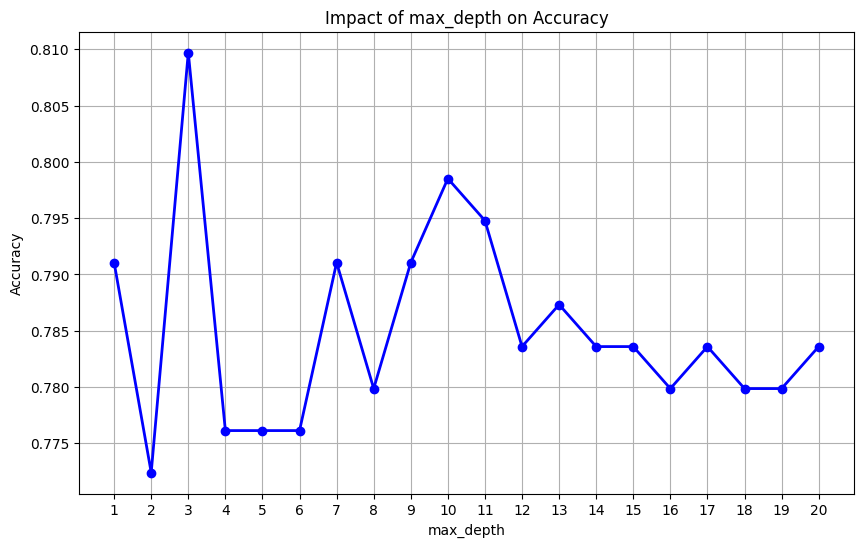

In [24]:
max_depth_values = range(1, 21)  # Trying depths from 1 to 20
accuracy_scores = []

for depth in max_depth_values:
    # Initialize the Decision Tree model with a specific max_depth
    model = DecisionTreeClassifier(max_depth=depth)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the impact of max_depth on accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Impact of max_depth on Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()

In [25]:
iris = load_iris()
X = iris['data']
Y = iris['target']
columns = iris['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Show your implementation on different dataset (5 points)

In [26]:
model = DecisionTree(columns=columns, depth=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy
print(f"Accuracy Score on Test Data: {accuracy:.4f}")

Accuracy Score on Test Data: 0.9556
